# Eastern Washington Digital Equity

## Nicholas Tran, Juliana Reyes, Trevor Myers

# PCA - Method 1

jupyter nbconvert notebooks/pca_method2.ipynb --to slides --post serve --SlidesExporter.reveal_scroll=True

## Use PC1 As Index

## Use Correlation P Values for Feature Selection

## Create New Dataset w/ Removed Variables

## Use Stepwise Regression for Final Coefficients

## Prepare The Data

### Load The Libraries

In [1]:
library(tidyverse, quietly = TRUE)
library(psych, quietly = TRUE)
library(Hmisc, quietly = TRUE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0     ✔ purrr   1.0.1
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



Attaching package: ‘Hmisc’


The following object is masked from ‘package:psych’:

    describe


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




### Get The Data

In [2]:
data <- read.csv("../data/combined_data.csv")

In [3]:
head(data)

,NAME,GEOID,has_computer,with_internet,total_population,work_from_home,X65_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,"Census Tract 9601, Asotin County, Washington",53003960100,1664,1569,4320,145,1337,73942,12,58.00000,110.3274,41.78210,0.05170445
2,"Census Tract 9602, Asotin County, Washington",53003960200,1872,1780,4755,421,1352,72988,13,60.07692,145.7848,22.88731,0.02462630
3,"Census Tract 9603, Asotin County, Washington",53003960300,1279,1156,3633,6,396,38077,11,60.00000,173.4079,27.06202,0.02998058
4,"Census Tract 9604, Asotin County, Washington",53003960400,941,805,2517,29,647,38777,8,62.50000,127.6005,23.53829,0.02216379
5,"Census Tract 9605, Asotin County, Washington",53003960500,1345,1198,3517,26,635,42639,8,62.50000,192.4299,21.68565,0.02166087
6,"Census Tract 9606, Asotin County, Washington",53003960600,1542,1392,3894,115,909,53947,9,58.88889,151.0552,23.52123,0.02618557


#### Remove Unnecessary Columns

In [4]:
data <- data %>% dplyr::select(-NAME, -GEOID)

In [5]:
head(data)

,has_computer,with_internet,total_population,work_from_home,X65_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1664,1569,4320,145,1337,73942,12,58.00000,110.3274,41.78210,0.05170445
2,1872,1780,4755,421,1352,72988,13,60.07692,145.7848,22.88731,0.02462630
3,1279,1156,3633,6,396,38077,11,60.00000,173.4079,27.06202,0.02998058
4,941,805,2517,29,647,38777,8,62.50000,127.6005,23.53829,0.02216379
5,1345,1198,3517,26,635,42639,8,62.50000,192.4299,21.68565,0.02166087
6,1542,1392,3894,115,909,53947,9,58.88889,151.0552,23.52123,0.02618557


#### Standardize The Data

In [6]:
scaled_data <- scale(data)

In [7]:
head(scaled_data)

has_computer,with_internet,total_population,work_from_home,X65_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms
0.50245011,0.5167430,0.41151922,0.1292741,2.23493253,0.07418486,1.7094218,-0.18458632,-1.05913969,0.2831385,1.17991288
0.88153598,0.9194434,0.72118268,2.9303783,2.28240921,0.07416551,2.2108891,0.41923513,-0.64056563,-0.4304467,-0.15416598
-0.19922325,-0.2714809,-0.07753548,-1.2814270,-0.74343819,0.07345717,1.2079545,0.39687137,-0.31447576,-0.2727836,0.10962741
-0.81523778,-0.9413759,-0.87198242,-1.0480017,0.05100501,0.07347137,-0.2964475,1.12369349,-0.85523159,-0.4058615,-0.27548794
-0.07893639,-0.1913226,-0.16011240,-1.0784484,0.01302366,0.07354973,-0.2964475,1.12369349,-0.08992031,-0.4758288,-0.30026584
0.28010167,0.1789328,0.10826259,-0.1751938,0.88026444,0.07377917,0.2050198,0.07383932,-0.57834859,-0.4065058,-0.07734433


### Examine The Data

#### Variance

In [8]:
var(scaled_data)

,has_computer,with_internet,total_population,work_from_home,X65_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms
has_computer,1.0000000,0.9894358,0.88769674,0.429532198,0.63073622,0.16291986,-0.11586967,0.10884185,0.30554032,0.19648189,-0.201306736
with_internet,0.9894358,1.0000000,0.88409177,0.444207496,0.62529208,0.16040888,-0.12882664,0.13640579,0.34507339,0.19906151,-0.236716631
total_population,0.8876967,0.8840918,1.00000000,0.465567411,0.55262306,0.02849018,-0.12177616,0.07103486,0.26876416,0.16742756,-0.141781841
work_from_home,0.4295322,0.4442075,0.46556741,1.000000000,0.39074417,0.03663670,0.02939906,-0.00620995,0.03144231,-0.05867872,0.008545821
X65_and_older,0.6307362,0.6252921,0.55262306,0.390744170,1.00000000,0.14854040,0.05292992,0.05050125,-0.04232679,-0.16920740,0.102017655
median_income,0.1629199,0.1604089,0.02849018,0.036636701,0.14854040,1.00000000,0.02199604,-0.05377681,-0.04773346,-0.01815921,0.058520706
number_providers,-0.1158697,-0.1288266,-0.12177616,0.029399058,0.05292992,0.02199604,1.00000000,-0.32945829,-0.48020798,-0.01627282,0.446802457
mean_lowest_cost,0.1088418,0.1364058,0.07103486,-0.006209950,0.05050125,-0.05377681,-0.32945829,1.00000000,0.19664282,0.08436356,-0.181091388
mean_d_mbps,0.3055403,0.3450734,0.26876416,0.031442306,-0.04232679,-0.04773346,-0.48020798,0.19664282,1.00000000,0.40439966,-0.831561029
mean_u_mbps,0.1964819,0.1990615,0.16742756,-0.058678724,-0.16920740,-0.01815921,-0.01627282,0.08436356,0.40439966,1.00000000,-0.421146282


#### Correlation

In [9]:
cor(scaled_data)

,has_computer,with_internet,total_population,work_from_home,X65_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms
has_computer,1.0000000,0.9894358,0.88769674,0.429532198,0.63073622,0.16291986,-0.11586967,0.10884185,0.30554032,0.19648189,-0.201306736
with_internet,0.9894358,1.0000000,0.88409177,0.444207496,0.62529208,0.16040888,-0.12882664,0.13640579,0.34507339,0.19906151,-0.236716631
total_population,0.8876967,0.8840918,1.00000000,0.465567411,0.55262306,0.02849018,-0.12177616,0.07103486,0.26876416,0.16742756,-0.141781841
work_from_home,0.4295322,0.4442075,0.46556741,1.000000000,0.39074417,0.03663670,0.02939906,-0.00620995,0.03144231,-0.05867872,0.008545821
X65_and_older,0.6307362,0.6252921,0.55262306,0.390744170,1.00000000,0.14854040,0.05292992,0.05050125,-0.04232679,-0.16920740,0.102017655
median_income,0.1629199,0.1604089,0.02849018,0.036636701,0.14854040,1.00000000,0.02199604,-0.05377681,-0.04773346,-0.01815921,0.058520706
number_providers,-0.1158697,-0.1288266,-0.12177616,0.029399058,0.05292992,0.02199604,1.00000000,-0.32945829,-0.48020798,-0.01627282,0.446802457
mean_lowest_cost,0.1088418,0.1364058,0.07103486,-0.006209950,0.05050125,-0.05377681,-0.32945829,1.00000000,0.19664282,0.08436356,-0.181091388
mean_d_mbps,0.3055403,0.3450734,0.26876416,0.031442306,-0.04232679,-0.04773346,-0.48020798,0.19664282,1.00000000,0.40439966,-0.831561029
mean_u_mbps,0.1964819,0.1990615,0.16742756,-0.058678724,-0.16920740,-0.01815921,-0.01627282,0.08436356,0.40439966,1.00000000,-0.421146282


## Create The Index

### Apply PCA

In [10]:
pca_data <- prcomp(data, scale = TRUE, center = TRUE)

# disable scientific notation
options(scipen = 999)

### Means

In [11]:
as.list(pca_data$center)

$has_computer
[1] 1388.311

$with_internet
[1] 1298.246

$total_population
[1] 3741.918

$work_from_home
[1] 132.2623

$X65_and_older
[1] 630.8852

$median_income
[1] -3582328

$number_providers
[1] 8.59116

$mean_lowest_cost
[1] 58.63491

$mean_d_mbps
[1] 200.0471

$mean_u_mbps
[1] 34.28497

$mean_lat_ms
[1] 0.02775545

### Standard Deviations

In [12]:
as.list(pca_data$scale)

$has_computer
[1] 548.6884

$with_internet
[1] 523.9627

$total_population
[1] 1404.751

$work_from_home
[1] 98.53257

$X65_and_older
[1] 315.9446

$median_income
[1] 49285932

$number_providers
[1] 1.994148

$mean_lowest_cost
[1] 3.439631

$mean_d_mbps
[1] 84.70996

$mean_u_mbps
[1] 26.47868

$mean_lat_ms
[1] 0.02029727

### Eigenvectors

In [13]:
eigenvectors <- -pca_data$rotation

In [14]:
eigenvectors

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
has_computer,0.47919705,-0.1268249,0.06154895,0.02249805,0.082450809,-0.170916796,-0.10743319,0.16049814,0.157125222,0.402468269,0.7000070809
with_internet,0.48511745,-0.1067514,0.04853273,0.02101569,0.075662979,-0.137584991,-0.06559733,0.18549698,0.125568202,0.404770143,-0.7123869772
total_population,0.45150948,-0.1341981,0.04862688,-0.13845549,0.029444584,-0.145410785,-0.29710901,0.22683251,-0.099951346,-0.764727493,-0.0076894091
work_from_home,0.26110792,-0.2293261,-0.05407837,-0.22589947,-0.304757368,0.848481403,-0.04815021,-0.08186524,-0.012624330,0.054694488,0.0175550506
X65_and_older,0.31626111,-0.3335954,-0.17476200,0.03416679,-0.000599359,-0.215988050,0.52578086,-0.64149740,-0.098342671,-0.112678605,-0.0007018638
median_income,0.06593853,-0.1275799,0.09793375,0.95136781,-0.003448479,0.215137821,-0.01978329,0.05922046,-0.029600007,-0.116645941,0.0025893128
number_providers,-0.13912814,-0.3709887,0.50891597,-0.13982215,0.296737255,0.116798365,0.54471681,0.40120998,-0.038937837,-0.057834727,0.0149429896
mean_lowest_cost,0.10661612,0.2082061,-0.58684768,0.01051921,0.689754467,0.264049516,0.16337918,0.15961272,-0.009808512,-0.051505392,0.0195194073
mean_d_mbps,0.25782171,0.4831156,0.07731489,0.02340106,-0.230461927,-0.004866702,0.28024093,0.18060900,-0.719928054,0.098602974,0.0359462000
mean_u_mbps,0.13850507,0.3144688,0.57227046,-0.03954638,0.472066631,0.176606776,-0.22875269,-0.49429226,-0.044789391,0.002975945,-0.0128023036


### Eigenvalues

In [15]:
eigenvalues <- pca_data$sdev^2

In [16]:
as.list(eigenvalues)

[[1]]
[1] 3.876186

[[2]]
[1] 2.39202

[[3]]
[1] 1.139188

[[4]]
[1] 0.9938866

[[5]]
[1] 0.8232953

[[6]]
[1] 0.6606234

[[7]]
[1] 0.4828396

[[8]]
[1] 0.3470778

[[9]]
[1] 0.1592888

[[10]]
[1] 0.1166514

[[11]]
[1] 0.008943228

### Principal Component Scores

In [17]:
principal_components <- -pca_data$x

In [18]:
head(principal_components)

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0.6888514,-2.65693442,0.6171702,-0.2276232,1.0833837,-0.4353841,1.0210891,-0.9122902,-0.1977161,-0.1011978,-0.04757314
2.2299770,-2.84859344,0.1837251,-0.8724234,0.1226496,1.9321696,1.9420858,-0.1642138,0.4080204,-0.1764768,0.03146945
-1.0941835,-0.06207896,0.3668369,0.1700875,0.9528205,-0.6352557,0.3845289,1.1060140,0.1463751,-0.2246969,0.04989017
-1.5527524,0.47874603,-1.1623565,0.4481435,0.7836069,-0.2784191,0.4705508,-0.3235346,0.6591823,-0.2982396,0.08250591
-0.3418799,0.58979836,-1.0159321,0.4089459,0.7161696,-0.6432504,0.3527014,0.2963316,0.2701854,-0.1700480,0.08621016
0.2972542,-0.76045101,-0.3139671,0.1117709,0.1276237,-0.4322418,0.4816347,-0.2483354,0.4449293,-0.1051930,0.05378802


### Percent Explained

In [19]:
percent_explained <- data.frame(
    PC = paste0("PC", 1:11),
    variance_explained = (eigenvalues / sum(eigenvalues)),
    total_percent = cumsum((eigenvalues / sum(eigenvalues)))
)

In [20]:
percent_explained

PC,variance_explained,total_percent
<chr>,<dbl>,<dbl>
PC1,0.3523805118,0.3523805
PC2,0.2174564036,0.5698369
PC3,0.1035625153,0.6733994
PC4,0.0903533296,0.7637528
PC5,0.0748450250,0.8385978
PC6,0.0600566770,0.8986545
PC7,0.0438945135,0.9425490
PC8,0.0315525312,0.9741015
PC9,0.0144807957,0.9885823


### Use The Scores From PC1 As Index

#### PC1 Eigenvector

In [22]:
as.list(eigenvectors[, 1])

$has_computer
[1] 0.4791971

$with_internet
[1] 0.4851175

$total_population
[1] 0.4515095

$work_from_home
[1] 0.2611079

$X65_and_older
[1] 0.3162611

$median_income
[1] 0.06593853

$number_providers
[1] -0.1391281

$mean_lowest_cost
[1] 0.1066161

$mean_d_mbps
[1] 0.2578217

$mean_u_mbps
[1] 0.1385051

$mean_lat_ms
[1] -0.2055354

#### Multiply PC1 by Scaled Data

In [23]:
head(scaled_data %*% eigenvectors[, 1])

0.6888514
2.2299770
-1.0941835
-1.5527524
-0.3418799
0.2972542


#### We See That The Scores In PC1 Are The Same

In [24]:
index <- as.data.frame(-pca_data$x) %>%
    select(PC1) %>%
    rename(index = PC1)

head(index)

,index
,<dbl>
1,0.6888514
2,2.2299770
3,-1.0941835
4,-1.5527524
5,-0.3418799
6,0.2972542


#### Append to DataFrame

In [25]:
index_data <- bind_cols(scaled_data, index)
head(index_data)

,has_computer,with_internet,total_population,work_from_home,X65_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms,index
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.50245011,0.5167430,0.41151922,0.1292741,2.23493253,0.07418486,1.7094218,-0.18458632,-1.05913969,0.2831385,1.17991288,0.6888514
2,0.88153598,0.9194434,0.72118268,2.9303783,2.28240921,0.07416551,2.2108891,0.41923513,-0.64056563,-0.4304467,-0.15416598,2.2299770
3,-0.19922325,-0.2714809,-0.07753548,-1.2814270,-0.74343819,0.07345717,1.2079545,0.39687137,-0.31447576,-0.2727836,0.10962741,-1.0941835
4,-0.81523778,-0.9413759,-0.87198242,-1.0480017,0.05100501,0.07347137,-0.2964475,1.12369349,-0.85523159,-0.4058615,-0.27548794,-1.5527524
5,-0.07893639,-0.1913226,-0.16011240,-1.0784484,0.01302366,0.07354973,-0.2964475,1.12369349,-0.08992031,-0.4758288,-0.30026584,-0.3418799
6,0.28010167,0.1789328,0.10826259,-0.1751938,0.88026444,0.07377917,0.2050198,0.07383932,-0.57834859,-0.4065058,-0.07734433,0.2972542


### Test The Index

In [26]:
as.list(rcorr(as.matrix(index_data), type = "pearson")$P[, 12])

$has_computer
[1] 0

$with_internet
[1] 0

$total_population
[1] 0

$work_from_home
[1] 0.0000000000000985878

$X65_and_older
[1] 0

$median_income
[1] 0.07984977

$number_providers
[1] 0.0001753641

$mean_lowest_cost
[1] 0.004345284

$mean_d_mbps
[1] 0.000000000000223821

$mean_u_mbps
[1] 0.0001879974

$mean_lat_ms
[1] 0.00000001335107

$index
[1] NA

#### We remove variables with a p value greater than alpha of .05

In [27]:
rcorr(as.matrix(index_data), type = "pearson")$P

,has_computer,with_internet,total_population,work_from_home,X65_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms,index
has_computer,NA,0.0000000000000000,0.0000000000000000000000,0.0000000012988157216,0.0000000000000000000000,0.02755381,0.118292436762502007,0.142469388878,0.000025995933165657,0.007680971891602,0.0062836851041634,0.0000000000000000000
with_internet,0.000000000000000,NA,0.0000000000000000000000,0.0000000002997904147,0.0000000000000000000000,0.03006990,0.082203264746717686,0.065587150157,0.000001719724394889,0.006902898453880,0.0012541075067722,0.0000000000000000000
total_population,0.000000000000000,0.0000000000000000,NA,0.0000000000312003756,0.0000000000000004440892,0.70183475,0.100551272738960584,0.339292030314,0.000234350069882705,0.023487314969218,0.0555524971855204,0.0000000000000000000
work_from_home,0.000000001298816,0.0000000002997904,0.0000000000312003756164,NA,0.0000000453473543160499,0.62244972,0.692796119793770648,0.933508191298,0.672635578892659680,0.430093269468229,0.9085912323262459,0.0000000000000985878
X65_and_older,0.000000000000000,0.0000000000000000,0.0000000000000004440892,0.0000000453473543160,NA,0.04477147,0.476702946467304045,0.497188268940,0.569411922064836595,0.022030156319832,0.1693793288053427,0.0000000000000000000
median_income,0.027553811908482,0.0300698982044132,0.7018347511899820645453,0.6224497181702566273,0.0447714724648202722079,NA,0.767570871280282230,0.469668921788,0.521089097196837159,0.807238517875172,0.4313383103711319,0.0798497652907588229
number_providers,0.118292436762502,0.0822032647467177,0.1005512727389605842632,0.6927961197937706483,0.4767029464673040450862,0.76757087,NA,0.000005261423,0.000000000006029399,0.826929938720940,0.0000000002296336,0.0001753641257757899
mean_lowest_cost,0.142469388877798,0.0655871501573895,0.3392920303139159710071,0.9335081912981513241,0.4971882689404691912927,0.46966892,0.000005261422731273,NA,0.007630242115620911,0.256184957503357,0.0141555670114635,0.0043452842733402441
mean_d_mbps,0.000025995933166,0.0000017197243949,0.0002343500698827050144,0.6726355788926596802,0.5694119220648365953252,0.52108910,0.000000000006029399,0.007630242116,NA,0.000000013665493,0.0000000000000000,0.0000000000002238210
mean_u_mbps,0.007680971891602,0.0069028984538804,0.0234873149692178539993,0.4300932694682289004,0.0220301563198315175640,0.80723852,0.826929938720939672,0.256184957503,0.000000013665493181,NA,0.0000000029104892,0.0001879974171026255


In [28]:
rcorr(as.matrix(index_data), type = "pearson")$r

,has_computer,with_internet,total_population,work_from_home,X65_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms,index
has_computer,1.0000000,0.9894358,0.88769674,0.429532198,0.63073622,0.16291986,-0.11586967,0.10884185,0.30554032,0.19648189,-0.201306736,0.9434446
with_internet,0.9894358,1.0000000,0.88409177,0.444207496,0.62529208,0.16040888,-0.12882664,0.13640579,0.34507339,0.19906151,-0.236716631,0.9551007
total_population,0.8876967,0.8840918,1.00000000,0.465567411,0.55262306,0.02849018,-0.12177616,0.07103486,0.26876416,0.16742756,-0.141781841,0.8889333
work_from_home,0.4295322,0.4442075,0.46556741,1.000000000,0.39074417,0.03663670,0.02939906,-0.00620995,0.03144231,-0.05867872,0.008545821,0.5140701
X65_and_older,0.6307362,0.6252921,0.55262306,0.390744170,1.00000000,0.14854040,0.05292992,0.05050125,-0.04232679,-0.16920740,0.102017655,0.6226558
median_income,0.1629199,0.1604089,0.02849018,0.036636701,0.14854040,1.00000000,0.02199604,-0.05377681,-0.04773346,-0.01815921,0.058520706,0.1298200
number_providers,-0.1158697,-0.1288266,-0.12177616,0.029399058,0.05292992,0.02199604,1.00000000,-0.32945829,-0.48020798,-0.01627282,0.446802457,-0.2739159
mean_lowest_cost,0.1088418,0.1364058,0.07103486,-0.006209950,0.05050125,-0.05377681,-0.32945829,1.00000000,0.19664282,0.08436356,-0.181091388,0.2099062
mean_d_mbps,0.3055403,0.3450734,0.26876416,0.031442306,-0.04232679,-0.04773346,-0.48020798,0.19664282,1.00000000,0.40439966,-0.831561029,0.5076002
mean_u_mbps,0.1964819,0.1990615,0.16742756,-0.058678724,-0.16920740,-0.01815921,-0.01627282,0.08436356,0.40439966,1.00000000,-0.421146282,0.2726892


In [29]:
data1.2 <- data %>% select(-median_income)
scaled_data1.2 <- scale(data1.2)

#### Check To See if The Data Are Good

MSA closer to 1 are good. Overall MSA >= .6 means to proceed

In [30]:
KMO(data1.2)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = data1.2)
Overall MSA =  0.75
MSA for each item = 
    has_computer    with_internet total_population   work_from_home 
            0.71             0.72             0.95             0.87 
   X65_and_older number_providers mean_lowest_cost      mean_d_mbps 
            0.91             0.67             0.55             0.69 
     mean_u_mbps      mean_lat_ms 
            0.65             0.68 

In [31]:
cortest.bartlett(cov(scaled_data1.2), 183)

$chisq
[1] 1533.558

$p.value
[1] 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000004444994

$df
[1] 45

### Redo PCA with New Data

In [32]:
pca_data1.2 <- prcomp(data1.2, scale = TRUE, center = TRUE)
eigenvectors1.2 <- -pca_data1.2$rotation
eigenvalues1.2 <- pca_data1.2$sdev^2

index1.2 <- as.data.frame(-pca_data1.2$x) %>%
    select(PC1) %>%
    rename(index = PC1)

index_data1.2 <- bind_cols(scaled_data1.2, index1.2)

In [33]:
head(index_data1.2)

,has_computer,with_internet,total_population,work_from_home,X65_and_older,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms,index
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.50245011,0.5167430,0.41151922,0.1292741,2.23493253,1.7094218,-0.18458632,-1.05913969,0.2831385,1.17991288,0.6628607
2,0.88153598,0.9194434,0.72118268,2.9303783,2.28240921,2.2108891,0.41923513,-0.64056563,-0.4304467,-0.15416598,2.2095890
3,-0.19922325,-0.2714809,-0.07753548,-1.2814270,-0.74343819,1.2079545,0.39687137,-0.31447576,-0.2727836,0.10962741,-1.1018270
4,-0.81523778,-0.9413759,-0.87198242,-1.0480017,0.05100501,-0.2964475,1.12369349,-0.85523159,-0.4058615,-0.27548794,-1.5571455
5,-0.07893639,-0.1913226,-0.16011240,-1.0784484,0.01302366,-0.2964475,1.12369349,-0.08992031,-0.4758288,-0.30026584,-0.3430116
6,0.28010167,0.1789328,0.10826259,-0.1751938,0.88026444,0.2050198,0.07383932,-0.57834859,-0.4065058,-0.07734433,0.2861899


## Calculate The Final Coefficients with Stepwise Regression

### Create Models

In [34]:
# https://www.statology.org/stepwise-regression-r/
intercept <- lm(index_data1.2$index ~ 1, index_data1.2)
lm_data <- lm(index_data1.2$index ~ ., index_data1.2)

forward <- step(intercept, direction = "forward", scope = formula(lm_data), trace = 0)
backward <- step(lm_data, direction = "backward", scope = formula(lm_data), trace = 0)
both <- step(intercept, direction = "both", scope = formula(lm_data), trace = 0)

forward_bic <- step(intercept, direction = "forward", scope = formula(lm_data), trace = 0, k = log(nrow(index_data1.2)))
backward_bic <- step(lm_data, direction = "backward", scope = formula(lm_data), trace = 0, k = log(nrow(index_data1.2)))
both_bic <- step(intercept, direction = "both", scope = formula(lm_data), trace = 0, k = log(nrow(index_data1.2)))

Warning message:
“attempting model selection on an essentially perfect fit is nonsense”
Warning message:
“attempting model selection on an essentially perfect fit is nonsense”
Warning message:
“attempting model selection on an essentially perfect fit is nonsense”
Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


#### Forwards Stepwise

In [35]:
forward$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,182,703.20098621800843829987570643424987793,248.3467
+ with_internet,-1,637.5479317,181,65.65305450550512489371612900868058205,-183.5937
+ mean_d_mbps,-1,27.9735433,180,37.67951116380591258803178789094090462,-283.2077
+ work_from_home,-1,12.0184712,179,25.66103994550458722301300440449267626,-351.5057
+ total_population,-1,7.0349847,178,18.62605519741248727427773701492697001,-408.1412
+ X65_and_older,-1,6.2928412,177,12.33321403238071489738558739190921187,-481.5858
+ mean_lat_ms,-1,4.1275863,176,8.20562772852354882502368127461522818,-554.1539
+ mean_lowest_cost,-1,3.1482264,175,5.05740130314562819080492772627621889,-640.7199
+ mean_u_mbps,-1,1.6553191,174,3.40208220439476161089942252147011459,-711.2730


In [36]:
forward_bic$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,182,703.20098621800843829987570643424987793,251.5561
+ with_internet,-1,637.5479317,181,65.65305450550512489371612900868058205,-177.1747
+ mean_d_mbps,-1,27.9735433,180,37.67951116380591258803178789094090462,-273.5792
+ work_from_home,-1,12.0184712,179,25.66103994550458722301300440449267626,-338.6678
+ total_population,-1,7.0349847,178,18.62605519741248727427773701492697001,-392.0938
+ X65_and_older,-1,6.2928412,177,12.33321403238071489738558739190921187,-462.3289
+ mean_lat_ms,-1,4.1275863,176,8.20562772852354882502368127461522818,-531.6875
+ mean_lowest_cost,-1,3.1482264,175,5.05740130314562819080492772627621889,-615.0440
+ mean_u_mbps,-1,1.6553191,174,3.40208220439476161089942252147011459,-682.3876


In [37]:
forward


Call:
lm(formula = index_data1.2$index ~ with_internet + mean_d_mbps + 
    work_from_home + total_population + X65_and_older + mean_lat_ms + 
    mean_lowest_cost + mean_u_mbps + number_providers + has_computer, 
    data = index_data1.2)

Coefficients:
           (Intercept)           with_internet             mean_d_mbps  
-0.0000000000000000341   0.4844094907499328362   0.2623924148424930936  
        work_from_home        total_population           X65_and_older  
 0.2609643935694284655   0.4528009461375878120   0.3137032282915110937  
           mean_lat_ms        mean_lowest_cost             mean_u_mbps  
-0.2101406902830652568   0.1092570389869753633   0.1410615093362440342  
      number_providers            has_computer  
-0.1420782190977260828   0.4783054033677653916  


In [38]:
forward_bic


Call:
lm(formula = index_data1.2$index ~ with_internet + mean_d_mbps + 
    work_from_home + total_population + X65_and_older + mean_lat_ms + 
    mean_lowest_cost + mean_u_mbps + number_providers + has_computer, 
    data = index_data1.2)

Coefficients:
           (Intercept)           with_internet             mean_d_mbps  
-0.0000000000000000341   0.4844094907499328362   0.2623924148424930936  
        work_from_home        total_population           X65_and_older  
 0.2609643935694284655   0.4528009461375878120   0.3137032282915110937  
           mean_lat_ms        mean_lowest_cost             mean_u_mbps  
-0.2101406902830652568   0.1092570389869753633   0.1410615093362440342  
      number_providers            has_computer  
-0.1420782190977260828   0.4783054033677653916  


In [39]:
summary(forward)

Warning message in summary.lm(forward):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = index_data1.2$index ~ with_internet + mean_d_mbps + 
    work_from_home + total_population + X65_and_older + mean_lat_ms + 
    mean_lowest_cost + mean_u_mbps + number_providers + has_computer, 
    data = index_data1.2)

Residuals:
                   Min                     1Q                 Median 
-0.0000000000000026870 -0.0000000000000001139  0.0000000000000000141 
                    3Q                    Max 
 0.0000000000000001618  0.0000000000000028486 

Coefficients:
                                Estimate              Std. Error
(Intercept)      -0.00000000000000003410  0.00000000000000003595
with_internet     0.48440949074993283618  0.00000000000000027484
mean_d_mbps       0.26239241484249309355  0.00000000000000007136
work_from_home    0.26096439356942846555  0.00000000000000004236
total_population  0.45280094613758781197  0.00000000000000008164
X65_and_older     0.31370322829151109367  0.00000000000000005221
mean_lat_ms      -0.21014069028306525677  0

In [40]:
summary(forward_bic)

Warning message in summary.lm(forward_bic):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = index_data1.2$index ~ with_internet + mean_d_mbps + 
    work_from_home + total_population + X65_and_older + mean_lat_ms + 
    mean_lowest_cost + mean_u_mbps + number_providers + has_computer, 
    data = index_data1.2)

Residuals:
                   Min                     1Q                 Median 
-0.0000000000000026870 -0.0000000000000001139  0.0000000000000000141 
                    3Q                    Max 
 0.0000000000000001618  0.0000000000000028486 

Coefficients:
                                Estimate              Std. Error
(Intercept)      -0.00000000000000003410  0.00000000000000003595
with_internet     0.48440949074993283618  0.00000000000000027484
mean_d_mbps       0.26239241484249309355  0.00000000000000007136
work_from_home    0.26096439356942846555  0.00000000000000004236
total_population  0.45280094613758781197  0.00000000000000008164
X65_and_older     0.31370322829151109367  0.00000000000000005221
mean_lat_ms      -0.21014069028306525677  0

#### Backwards Stepwise

In [41]:
backward$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,172,0.0000000000000000000000000001257256,-12687.89


In [42]:
backward_bic$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,172,0.0000000000000000000000000001257256,-12652.58


In [43]:
backward


Call:
lm(formula = index_data1.2$index ~ has_computer + with_internet + 
    total_population + work_from_home + X65_and_older + number_providers + 
    mean_lowest_cost + mean_d_mbps + mean_u_mbps + mean_lat_ms, 
    data = index_data1.2)

Coefficients:
           (Intercept)            has_computer           with_internet  
-0.0000000000000000341   0.4783054033677658912   0.4844094907499331693  
      total_population          work_from_home           X65_and_older  
 0.4528009461375878120   0.2609643935694285766   0.3137032282915111492  
      number_providers        mean_lowest_cost             mean_d_mbps  
-0.1420782190977260828   0.1092570389869754882   0.2623924148424926495  
           mean_u_mbps             mean_lat_ms  
 0.1410615093362440897  -0.2101406902830655343  


In [44]:
backward_bic


Call:
lm(formula = index_data1.2$index ~ has_computer + with_internet + 
    total_population + work_from_home + X65_and_older + number_providers + 
    mean_lowest_cost + mean_d_mbps + mean_u_mbps + mean_lat_ms, 
    data = index_data1.2)

Coefficients:
           (Intercept)            has_computer           with_internet  
-0.0000000000000000341   0.4783054033677658912   0.4844094907499331693  
      total_population          work_from_home           X65_and_older  
 0.4528009461375878120   0.2609643935694285766   0.3137032282915111492  
      number_providers        mean_lowest_cost             mean_d_mbps  
-0.1420782190977260828   0.1092570389869754882   0.2623924148424926495  
           mean_u_mbps             mean_lat_ms  
 0.1410615093362440897  -0.2101406902830655343  


In [45]:
summary(backward)

Warning message in summary.lm(backward):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = index_data1.2$index ~ has_computer + with_internet + 
    total_population + work_from_home + X65_and_older + number_providers + 
    mean_lowest_cost + mean_d_mbps + mean_u_mbps + mean_lat_ms, 
    data = index_data1.2)

Residuals:
                   Min                     1Q                 Median 
-0.0000000000000023792 -0.0000000000000002494 -0.0000000000000000194 
                    3Q                    Max 
 0.0000000000000001804  0.0000000000000090374 

Coefficients:
                                Estimate              Std. Error
(Intercept)      -0.00000000000000003410  0.00000000000000006320
has_computer      0.47830540336776589116  0.00000000000000047643
with_internet     0.48440949074993316925  0.00000000000000048321
total_population  0.45280094613758781197  0.00000000000000014354
work_from_home    0.26096439356942857657  0.00000000000000007448
X65_and_older     0.31370322829151114918  0.00000000000000009179
number_providers -0.14207821909772608282  0

In [46]:
summary(backward_bic)

Warning message in summary.lm(backward_bic):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = index_data1.2$index ~ has_computer + with_internet + 
    total_population + work_from_home + X65_and_older + number_providers + 
    mean_lowest_cost + mean_d_mbps + mean_u_mbps + mean_lat_ms, 
    data = index_data1.2)

Residuals:
                   Min                     1Q                 Median 
-0.0000000000000023792 -0.0000000000000002494 -0.0000000000000000194 
                    3Q                    Max 
 0.0000000000000001804  0.0000000000000090374 

Coefficients:
                                Estimate              Std. Error
(Intercept)      -0.00000000000000003410  0.00000000000000006320
has_computer      0.47830540336776589116  0.00000000000000047643
with_internet     0.48440949074993316925  0.00000000000000048321
total_population  0.45280094613758781197  0.00000000000000014354
work_from_home    0.26096439356942857657  0.00000000000000007448
X65_and_older     0.31370322829151114918  0.00000000000000009179
number_providers -0.14207821909772608282  0

#### Stepwise in Both Directions

In [47]:
both$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,182,703.20098621800843829987570643424987793,248.3467
+ with_internet,-1,637.5479317,181,65.65305450550512489371612900868058205,-183.5937
+ mean_d_mbps,-1,27.9735433,180,37.67951116380591258803178789094090462,-283.2077
+ work_from_home,-1,12.0184712,179,25.66103994550458722301300440449267626,-351.5057
+ total_population,-1,7.0349847,178,18.62605519741248727427773701492697001,-408.1412
+ X65_and_older,-1,6.2928412,177,12.33321403238071489738558739190921187,-481.5858
+ mean_lat_ms,-1,4.1275863,176,8.20562772852354882502368127461522818,-554.1539
+ mean_lowest_cost,-1,3.1482264,175,5.05740130314562819080492772627621889,-640.7199
+ mean_u_mbps,-1,1.6553191,174,3.40208220439476161089942252147011459,-711.2730


In [48]:
both


Call:
lm(formula = index_data1.2$index ~ with_internet + mean_d_mbps + 
    work_from_home + total_population + X65_and_older + mean_lat_ms + 
    mean_lowest_cost + mean_u_mbps + number_providers + has_computer, 
    data = index_data1.2)

Coefficients:
           (Intercept)           with_internet             mean_d_mbps  
-0.0000000000000000341   0.4844094907499328362   0.2623924148424930936  
        work_from_home        total_population           X65_and_older  
 0.2609643935694284655   0.4528009461375878120   0.3137032282915110937  
           mean_lat_ms        mean_lowest_cost             mean_u_mbps  
-0.2101406902830652568   0.1092570389869753633   0.1410615093362440342  
      number_providers            has_computer  
-0.1420782190977260828   0.4783054033677653916  


In [49]:
both_bic


Call:
lm(formula = index_data1.2$index ~ with_internet + mean_d_mbps + 
    work_from_home + total_population + X65_and_older + mean_lat_ms + 
    mean_lowest_cost + mean_u_mbps + number_providers + has_computer, 
    data = index_data1.2)

Coefficients:
           (Intercept)           with_internet             mean_d_mbps  
-0.0000000000000000341   0.4844094907499328362   0.2623924148424930936  
        work_from_home        total_population           X65_and_older  
 0.2609643935694284655   0.4528009461375878120   0.3137032282915110937  
           mean_lat_ms        mean_lowest_cost             mean_u_mbps  
-0.2101406902830652568   0.1092570389869753633   0.1410615093362440342  
      number_providers            has_computer  
-0.1420782190977260828   0.4783054033677653916  


In [50]:
summary(both)

Warning message in summary.lm(both):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = index_data1.2$index ~ with_internet + mean_d_mbps + 
    work_from_home + total_population + X65_and_older + mean_lat_ms + 
    mean_lowest_cost + mean_u_mbps + number_providers + has_computer, 
    data = index_data1.2)

Residuals:
                   Min                     1Q                 Median 
-0.0000000000000026870 -0.0000000000000001139  0.0000000000000000141 
                    3Q                    Max 
 0.0000000000000001618  0.0000000000000028486 

Coefficients:
                                Estimate              Std. Error
(Intercept)      -0.00000000000000003410  0.00000000000000003595
with_internet     0.48440949074993283618  0.00000000000000027484
mean_d_mbps       0.26239241484249309355  0.00000000000000007136
work_from_home    0.26096439356942846555  0.00000000000000004236
total_population  0.45280094613758781197  0.00000000000000008164
X65_and_older     0.31370322829151109367  0.00000000000000005221
mean_lat_ms      -0.21014069028306525677  0

In [51]:
summary(both_bic)

Warning message in summary.lm(both_bic):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = index_data1.2$index ~ with_internet + mean_d_mbps + 
    work_from_home + total_population + X65_and_older + mean_lat_ms + 
    mean_lowest_cost + mean_u_mbps + number_providers + has_computer, 
    data = index_data1.2)

Residuals:
                   Min                     1Q                 Median 
-0.0000000000000026870 -0.0000000000000001139  0.0000000000000000141 
                    3Q                    Max 
 0.0000000000000001618  0.0000000000000028486 

Coefficients:
                                Estimate              Std. Error
(Intercept)      -0.00000000000000003410  0.00000000000000003595
with_internet     0.48440949074993283618  0.00000000000000027484
mean_d_mbps       0.26239241484249309355  0.00000000000000007136
work_from_home    0.26096439356942846555  0.00000000000000004236
total_population  0.45280094613758781197  0.00000000000000008164
X65_and_older     0.31370322829151109367  0.00000000000000005221
mean_lat_ms      -0.21014069028306525677  0

## We will end up using coefficients using another PCA method

# PCA Method 2

## Determine Amount of PCs To Use

## Variable Selection Based on sqrt(1/n)

## Create Index Using PCs

## Determine Number of PCs To Use

### Explain At Least 70% of The Data

In [52]:
percent_explained

PC,variance_explained,total_percent
<chr>,<dbl>,<dbl>
PC1,0.3523805118,0.3523805
PC2,0.2174564036,0.5698369
PC3,0.1035625153,0.6733994
PC4,0.0903533296,0.7637528
PC5,0.0748450250,0.8385978
PC6,0.0600566770,0.8986545
PC7,0.0438945135,0.9425490
PC8,0.0315525312,0.9741015
PC9,0.0144807957,0.9885823


### This method suggests 4 PCs

### Number of Eigenvalues Over 1

In [53]:
as.list(eigenvalues)

[[1]]
[1] 3.876186

[[2]]
[1] 2.39202

[[3]]
[1] 1.139188

[[4]]
[1] 0.9938866

[[5]]
[1] 0.8232953

[[6]]
[1] 0.6606234

[[7]]
[1] 0.4828396

[[8]]
[1] 0.3470778

[[9]]
[1] 0.1592888

[[10]]
[1] 0.1166514

[[11]]
[1] 0.008943228

### There are 3, but the 4th is close enough to 1

### Scree Plot

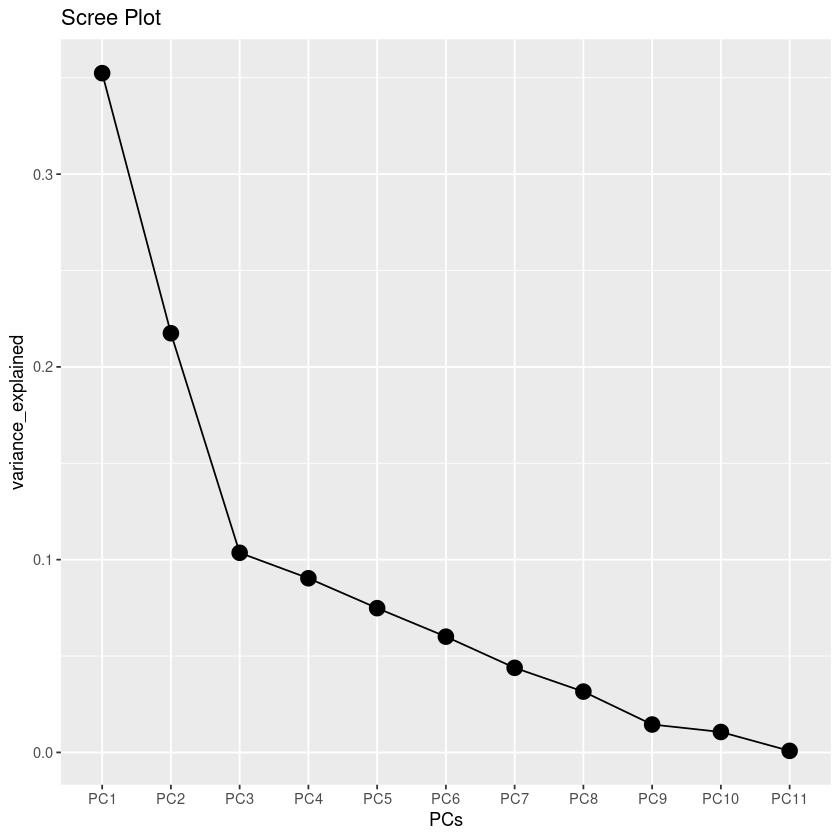

In [54]:
percent_explained %>%
    ggplot(aes(x = factor(PC, level = c("PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11")), y = variance_explained, group = 1, )) +
    geom_point(size = 4) +
    geom_line() +
    ggtitle("Scree Plot") +
    xlab("PCs")

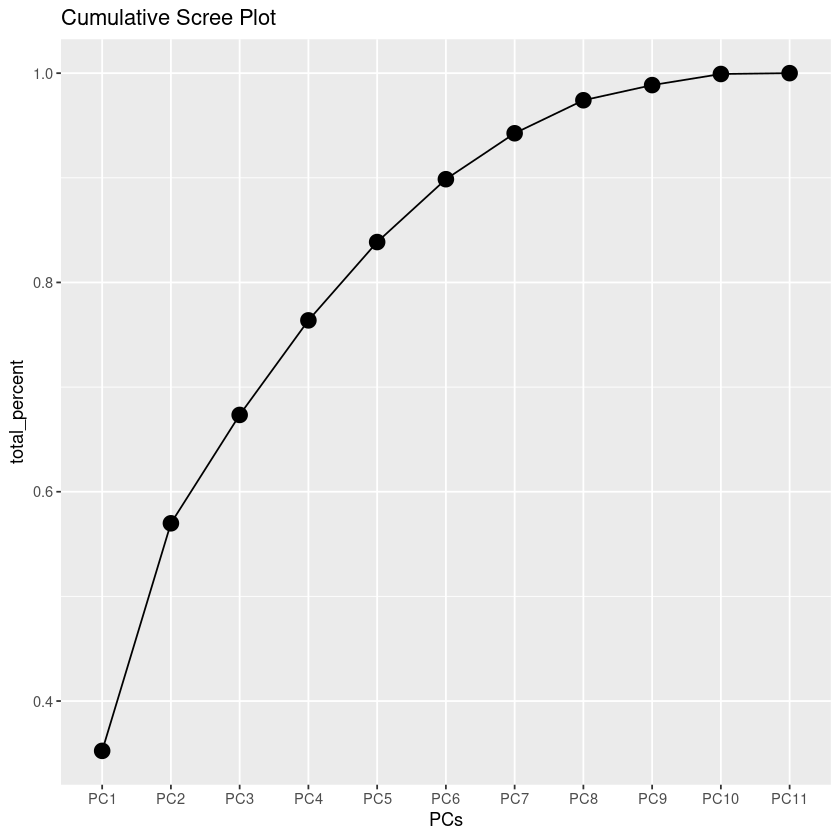

In [55]:
percent_explained %>%
    ggplot(aes(x = factor(PC, level = c("PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10", "PC11")), y = total_percent, group = 1, )) +
    geom_point(size = 4) +
    geom_line() +
    ggtitle("Cumulative Scree Plot") +
    xlab("PCs")

### We'll use 4

## Feature Selection

### Remove Variables That Don't Exceed sqrt(1/n) in PC 1-4

In [56]:
sqrt(1 / 11)

[1] 0.3015113

In [57]:
eigenvectors[, 1:4]

,PC1,PC2,PC3,PC4
has_computer,0.47919705,-0.1268249,0.06154895,0.02249805
with_internet,0.48511745,-0.1067514,0.04853273,0.02101569
total_population,0.45150948,-0.1341981,0.04862688,-0.13845549
work_from_home,0.26110792,-0.2293261,-0.05407837,-0.22589947
X65_and_older,0.31626111,-0.3335954,-0.17476200,0.03416679
median_income,0.06593853,-0.1275799,0.09793375,0.95136781
number_providers,-0.13912814,-0.3709887,0.50891597,-0.13982215
mean_lowest_cost,0.10661612,0.2082061,-0.58684768,0.01051921
mean_d_mbps,0.25782171,0.4831156,0.07731489,0.02340106
mean_u_mbps,0.13850507,0.3144688,0.57227046,-0.03954638


### Remove work_from_home And Redo PCA

In [58]:
data2.2 <- data %>% select(-work_from_home)
scaled_data2.2 <- scale(data2.2)
pca_data2.2 <- prcomp(data2.2, scale = TRUE, center = TRUE)
eigenvectors2.2 <- -pca_data2.2$rotation
eigenvalues2.2 <- pca_data2.2$sdev^2

## Create The Index

### Multiply Eigenvectors By Eigenvalues To Get Weights

In [59]:
weights <- eigenvectors2.2[, 1:4]

for (i in 1:ncol(weights)) {
    weights[i, ] <- weights[i, ] * eigenvalues2.2[i]
}

In [60]:
weights

,PC1,PC2,PC3,PC4
has_computer,1.77913978,-0.7371601,-0.18174513,0.10191438
with_internet,1.12326517,-0.4092197,-0.08610810,0.05456294
total_population,0.51321655,-0.2233574,-0.04999819,0.19979074
X65_and_older,0.29253949,-0.3777757,0.18280179,0.01994579
median_income,0.06447608,-0.1547037,-0.06833310,-0.96321866
number_providers,-0.17106081,-0.3619730,-0.50783733,0.15546126
mean_lowest_cost,0.12658845,0.1964745,0.59116240,0.05734334
mean_d_mbps,0.30137619,0.4601703,-0.08271679,-0.06070803
mean_u_mbps,0.17077554,0.2937255,-0.57183212,0.04990905
mean_lat_ms,-0.24878403,-0.4977831,0.11507377,0.07738318


#### Proof

In [61]:
as.list(eigenvalues2.2)

[[1]]
[1] 3.673563

[[2]]
[1] 2.289057

[[3]]
[1] 1.1378

[[4]]
[1] 0.9758747

[[5]]
[1] 0.8036515

[[6]]
[1] 0.4833632

[[7]]
[1] 0.3496148

[[8]]
[1] 0.1593852

[[9]]
[1] 0.1185223

[[10]]
[1] 0.009168685

In [62]:
eigenvectors2.2[, 1:4]

,PC1,PC2,PC3,PC4
has_computer,0.48430904,-0.2006662,-0.04947380,0.02774265
with_internet,0.49071091,-0.1787722,-0.03761729,0.02383643
total_population,0.45106051,-0.1963064,-0.04394287,0.17559394
X65_and_older,0.29977156,-0.3871150,0.18732096,0.02043888
median_income,0.06447608,-0.1547037,-0.06833310,-0.96321866
number_providers,-0.17106081,-0.3619730,-0.50783733,0.15546126
mean_lowest_cost,0.12658845,0.1964745,0.59116240,0.05734334
mean_d_mbps,0.30137619,0.4601703,-0.08271679,-0.06070803
mean_u_mbps,0.17077554,0.2937255,-0.57183212,0.04990905
mean_lat_ms,-0.24878403,-0.4977831,0.11507377,0.07738318


In [63]:
3.67356299607998 * 0.48430904

[1] 1.77914

In [64]:
2.28905685749779 * 0.49071091

[1] 1.123265

In [65]:
3.67356299607998 * -0.2006662

[1] -0.7371599

In [66]:
2.28905685749779 * -0.1787722

[1] -0.4092197

In [67]:
weights

,PC1,PC2,PC3,PC4
has_computer,1.77913978,-0.7371601,-0.18174513,0.10191438
with_internet,1.12326517,-0.4092197,-0.08610810,0.05456294
total_population,0.51321655,-0.2233574,-0.04999819,0.19979074
X65_and_older,0.29253949,-0.3777757,0.18280179,0.01994579
median_income,0.06447608,-0.1547037,-0.06833310,-0.96321866
number_providers,-0.17106081,-0.3619730,-0.50783733,0.15546126
mean_lowest_cost,0.12658845,0.1964745,0.59116240,0.05734334
mean_d_mbps,0.30137619,0.4601703,-0.08271679,-0.06070803
mean_u_mbps,0.17077554,0.2937255,-0.57183212,0.04990905
mean_lat_ms,-0.24878403,-0.4977831,0.11507377,0.07738318


### Sum The Weights

In [68]:
weights <- weights %>%
    as.data.frame() %>%
    transmute(weight = PC1 + PC2 + PC3 + PC4)

weights

,weight
,<dbl>
has_computer,0.96214893
with_internet,0.68250028
total_population,0.43965168
X65_and_older,0.11751133
median_income,-1.12177941
number_providers,-0.88540984
mean_lowest_cost,0.97156867
mean_d_mbps,0.61812169
mean_u_mbps,-0.05742208


### Multiply Standardized Data By Weights

In [69]:
index2 <- scaled_data2.2 %*% as.matrix(weights)
head(index2)

weight
-1.82116950
0.14173738
-1.50423514
-0.88512117
1.13444860
0.05881942


In [70]:
index_data2 <- bind_cols(scaled_data2.2, index2) %>%
    rename(index = weight)
head(index_data2)

has_computer,with_internet,total_population,X65_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms,index
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.50245011,0.5167430,0.41151922,2.23493253,0.07418486,1.7094218,-0.18458632,-1.05913969,0.2831385,1.17991288,-1.82116950
0.88153598,0.9194434,0.72118268,2.28240921,0.07416551,2.2108891,0.41923513,-0.64056563,-0.4304467,-0.15416598,0.14173738
-0.19922325,-0.2714809,-0.07753548,-0.74343819,0.07345717,1.2079545,0.39687137,-0.31447576,-0.2727836,0.10962741,-1.50423514
-0.81523778,-0.9413759,-0.87198242,0.05100501,0.07347137,-0.2964475,1.12369349,-0.85523159,-0.4058615,-0.27548794,-0.88512117
-0.07893639,-0.1913226,-0.16011240,0.01302366,0.07354973,-0.2964475,1.12369349,-0.08992031,-0.4758288,-0.30026584,1.13444860
0.28010167,0.1789328,0.10826259,0.88026444,0.07377917,0.2050198,0.07383932,-0.57834859,-0.4065058,-0.07734433,0.05881942


## Check Reliability

In [71]:
library(ltm)
cronbach.alpha(index_data2)
cronbach.alpha(index_data1.2)

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: msm

Loading required package: polycor


Attaching package: ‘polycor’


The following object is masked from ‘package:psych’:

    polyserial



Attaching package: ‘ltm’


The following object is masked from ‘package:psych’:

    factor.scores





Cronbach's alpha for the 'index_data2' data-set

Items: 11
Sample units: 183
alpha: 0.595



Cronbach's alpha for the 'index_data1.2' data-set

Items: 11
Sample units: 183
alpha: 0.741


# PCA - Method 3

## Create Index Using Method 2

## Feature Selection Using Method 1

## Stepwise Regression For Final Coefficients

## Create The Index

In [72]:
weights3 <- eigenvectors[, 1:4]

for (i in 1:ncol(weights3)) {
    weights3[i, ] <- weights3[i, ] * eigenvalues[i]
}
weights3

,PC1,PC2,PC3,PC4
has_computer,1.85745674,-0.4915969,0.23857515,0.08720662
with_internet,1.16041086,-0.2553516,0.11609129,0.05026997
total_population,0.51435403,-0.1528768,0.05539514,-0.15772678
work_from_home,0.25951167,-0.2279242,-0.05374777,-0.22451846
X65_and_older,0.31626111,-0.3335954,-0.17476200,0.03416679
median_income,0.06593853,-0.1275799,0.09793375,0.95136781
number_providers,-0.13912814,-0.3709887,0.50891597,-0.13982215
mean_lowest_cost,0.10661612,0.2082061,-0.58684768,0.01051921
mean_d_mbps,0.25782171,0.4831156,0.07731489,0.02340106
mean_u_mbps,0.13850507,0.3144688,0.57227046,-0.03954638


### Sum The Weights

In [73]:
weights3 <- weights3 %>%
    as.data.frame() %>%
    transmute(weight = PC1 + PC2 + PC3 + PC4)

weights3

,weight
,<dbl>
has_computer,1.6916416
with_internet,1.0714205
total_population,0.2591456
work_from_home,-0.2466787
X65_and_older,-0.1579295
median_income,0.9876602
number_providers,-0.1410231
mean_lowest_cost,-0.2615062
mean_d_mbps,0.8416533


### Create The Index

In [74]:
index3 <- scaled_data %*% as.matrix(weights3)

head(index3)

weight
-0.6124310
0.3997685
-1.0430769
-3.4276773
-0.5841471
-0.1990754


### Append To Dataframe

In [75]:
index_data3 <- bind_cols(scaled_data, index3) %>%
    rename(index = weight)

head(index_data3)

has_computer,with_internet,total_population,work_from_home,X65_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms,index
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.50245011,0.5167430,0.41151922,0.1292741,2.23493253,0.07418486,1.7094218,-0.18458632,-1.05913969,0.2831385,1.17991288,-0.6124310
0.88153598,0.9194434,0.72118268,2.9303783,2.28240921,0.07416551,2.2108891,0.41923513,-0.64056563,-0.4304467,-0.15416598,0.3997685
-0.19922325,-0.2714809,-0.07753548,-1.2814270,-0.74343819,0.07345717,1.2079545,0.39687137,-0.31447576,-0.2727836,0.10962741,-1.0430769
-0.81523778,-0.9413759,-0.87198242,-1.0480017,0.05100501,0.07347137,-0.2964475,1.12369349,-0.85523159,-0.4058615,-0.27548794,-3.4276773
-0.07893639,-0.1913226,-0.16011240,-1.0784484,0.01302366,0.07354973,-0.2964475,1.12369349,-0.08992031,-0.4758288,-0.30026584,-0.5841471
0.28010167,0.1789328,0.10826259,-0.1751938,0.88026444,0.07377917,0.2050198,0.07383932,-0.57834859,-0.4065058,-0.07734433,-0.1990754


### Check The Index

In [76]:
rcorr(as.matrix(index_data3), type = "pearson")$P

,has_computer,with_internet,total_population,work_from_home,X65_and_older,median_income,number_providers,mean_lowest_cost,mean_d_mbps,mean_u_mbps,mean_lat_ms,index
has_computer,NA,0.0000000000000000,0.0000000000000000000000,0.00000000129881572,0.0000000000000000000000,0.02755381191,0.118292436762502007,0.142469388878,0.000025995933165657,0.007680971891601551249,0.0062836851041634,0.000000000000000000000
with_internet,0.000000000000000,NA,0.0000000000000000000000,0.00000000029979041,0.0000000000000000000000,0.03006989820,0.082203264746717686,0.065587150157,0.000001719724394889,0.006902898453880368379,0.0012541075067722,0.000000000000000000000
total_population,0.000000000000000,0.0000000000000000,NA,0.00000000003120038,0.0000000000000004440892,0.70183475119,0.100551272738960584,0.339292030314,0.000234350069882705,0.023487314969217853999,0.0555524971855204,0.000000000000000000000
work_from_home,0.000000001298816,0.0000000002997904,0.0000000000312003756164,NA,0.0000000453473543160499,0.62244971817,0.692796119793770648,0.933508191298,0.672635578892659680,0.430093269468228900365,0.9085912323262459,0.001321796617837600607
X65_and_older,0.000000000000000,0.0000000000000000,0.0000000000000004440892,0.00000004534735432,NA,0.04477147246,0.476702946467304045,0.497188268940,0.569411922064836595,0.022030156319831517564,0.1693793288053427,0.000002270625868661114
median_income,0.027553811908482,0.0300698982044132,0.7018347511899820645453,0.62244971817025663,0.0447714724648202722079,NA,0.767570871280282230,0.469668921788,0.521089097196837159,0.807238517875172423288,0.4313383103711319,0.000024612294065695650
number_providers,0.118292436762502,0.0822032647467177,0.1005512727389605842632,0.69279611979377065,0.4767029464673040450862,0.76757087128,NA,0.000005261423,0.000000000006029399,0.826929938720939672336,0.0000000002296336,0.000099865333081261554
mean_lowest_cost,0.142469388877798,0.0655871501573895,0.3392920303139159710071,0.93350819129815132,0.4971882689404691912927,0.46966892179,0.000005261422731273,NA,0.007630242115620911,0.256184957503357457753,0.0141555670114635,0.133476390698823443870
mean_d_mbps,0.000025995933166,0.0000017197243949,0.0002343500698827050144,0.67263557889265968,0.5694119220648365953252,0.52108909720,0.000000000006029399,0.007630242116,NA,0.000000013665493181492,0.0000000000000000,0.000000000000000000000
mean_u_mbps,0.007680971891602,0.0069028984538804,0.0234873149692178539993,0.43009326946822890,0.0220301563198315175640,0.80723851788,0.826929938720939672,0.256184957503,0.000000013665493181,NA,0.0000000029104892,0.000000000000009769963


## Create New Dataset

In [77]:
data3 <- data %>% dplyr::select(-mean_lowest_cost)
scaled_data3 <- scale(data3)
pca_data3 <- prcomp(data3, scale = TRUE, center = TRUE)
eigenvectors3 <- -pca_data3$rotation
eigenvalues3 <- pca_data3$sdev^2

### Test It

In [78]:
KMO(scaled_data3)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = scaled_data3)
Overall MSA =  0.76
MSA for each item = 
    has_computer    with_internet total_population   work_from_home 
            0.72             0.73             0.92             0.87 
   X65_and_older    median_income number_providers      mean_d_mbps 
            0.92             0.51             0.73             0.68 
     mean_u_mbps      mean_lat_ms 
            0.67             0.67 

### Get New Weights

In [79]:
weights3.2 <- eigenvectors3[, 1:4]

for (i in 1:ncol(weights3.2)) {
    weights3.2[i, ] <- weights3.2[i, ] * eigenvalues3[i]
}

weights3.2 <- weights3.2 %>%
    as.data.frame() %>%
    transmute(weight = PC1 + PC2 + PC3 + PC4)

weights3.2

,weight
,<dbl>
has_computer,1.6862181
with_internet,1.0495200
total_population,0.5191128
work_from_home,0.1176700
X65_and_older,-0.2092369
median_income,-0.8022016
number_providers,0.3416037
mean_d_mbps,0.6579490
mean_u_mbps,1.2857042


### Multiply New Weights Against Data

In [80]:
index3.2 <- scaled_data3 %*% as.matrix(weights3.2)

head(index3.2)

weight
0.5613200
2.5159831
-0.9328225
-4.0116679
-1.1790841
-0.3296132


### Append To Dataframe

In [81]:
index_data3.2 <- bind_cols(scaled_data3, index3.2) %>%
    rename(index = weight)

head(index_data3.2)

has_computer,with_internet,total_population,work_from_home,X65_and_older,median_income,number_providers,mean_d_mbps,mean_u_mbps,mean_lat_ms,index
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.50245011,0.5167430,0.41151922,0.1292741,2.23493253,0.07418486,1.7094218,-1.05913969,0.2831385,1.17991288,0.5613200
0.88153598,0.9194434,0.72118268,2.9303783,2.28240921,0.07416551,2.2108891,-0.64056563,-0.4304467,-0.15416598,2.5159831
-0.19922325,-0.2714809,-0.07753548,-1.2814270,-0.74343819,0.07345717,1.2079545,-0.31447576,-0.2727836,0.10962741,-0.9328225
-0.81523778,-0.9413759,-0.87198242,-1.0480017,0.05100501,0.07347137,-0.2964475,-0.85523159,-0.4058615,-0.27548794,-4.0116679
-0.07893639,-0.1913226,-0.16011240,-1.0784484,0.01302366,0.07354973,-0.2964475,-0.08992031,-0.4758288,-0.30026584,-1.1790841
0.28010167,0.1789328,0.10826259,-0.1751938,0.88026444,0.07377917,0.2050198,-0.57834859,-0.4065058,-0.07734433,-0.3296132


### Test Index

In [105]:
cronbach.alpha(index_data3.2)


Cronbach's alpha for the 'index_data3.2' data-set

Items: 11
Sample units: 183
alpha: 0.665


## Stepwise Regression

In [83]:
intercept3 <- lm(index_data3.2$index ~ 1, index_data3.2)
lm_data3 <- lm(index_data3.2$index ~ ., index_data3.2)

forward3 <- step(intercept3, direction = "forward", scope = formula(lm_data3), trace = 0)
backward3 <- step(lm_data3, direction = "backward", scope = formula(lm_data3), trace = 0)
both3 <- step(intercept3, direction = "both", scope = formula(lm_data3), trace = 0)

forward_bic3 <- step(intercept3, direction = "forward", scope = formula(lm_data3), trace = 0, k = log(nrow(index_data3)))
backward_bic3 <- step(lm_data3, direction = "backward", scope = formula(lm_data3), trace = 0, k = log(nrow(index_data3)))
both_bic3 <- step(intercept3, direction = "both", scope = formula(lm_data3), trace = 0, k = log(nrow(index_data3)))

Warning message:
“attempting model selection on an essentially perfect fit is nonsense”
Warning message:
“attempting model selection on an essentially perfect fit is nonsense”
Warning message:
“attempting model selection on an essentially perfect fit is nonsense”
Warning message:
“attempting model selection on an essentially perfect fit is nonsense”


### Forward

In [85]:
forward3


Call:
lm(formula = index_data3.2$index ~ with_internet + mean_u_mbps + 
    median_income + mean_lat_ms + total_population + mean_d_mbps + 
    number_providers + has_computer + X65_and_older + work_from_home, 
    data = index_data3.2)

Coefficients:
           (Intercept)           with_internet             mean_u_mbps  
-0.0000000000000006572   1.0495199661698073612   1.2857042457982754691  
         median_income             mean_lat_ms        total_population  
-0.8022015736372023476  -0.6619683064261239203   0.5191128218685663320  
           mean_d_mbps        number_providers            has_computer  
 0.6579489520492821653   0.3416037293680653231   1.6862180583920760579  
         X65_and_older          work_from_home  
-0.2092369329121018529   0.1176699507223269991  


In [86]:
forward_bic3


Call:
lm(formula = index_data3.2$index ~ with_internet + mean_u_mbps + 
    median_income + mean_lat_ms + total_population + mean_d_mbps + 
    number_providers + has_computer + X65_and_older + work_from_home, 
    data = index_data3.2)

Coefficients:
           (Intercept)           with_internet             mean_u_mbps  
-0.0000000000000006572   1.0495199661698073612   1.2857042457982754691  
         median_income             mean_lat_ms        total_population  
-0.8022015736372023476  -0.6619683064261239203   0.5191128218685663320  
           mean_d_mbps        number_providers            has_computer  
 0.6579489520492821653   0.3416037293680653231   1.6862180583920760579  
         X65_and_older          work_from_home  
-0.2092369329121018529   0.1176699507223269991  


In [87]:
forward3$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,182,3250.938960216519262758083641529083252,528.529977
+ with_internet,-1,2313.454440,181,937.484519964219430221419315785169601,302.969679
+ mean_u_mbps,-1,604.160979,180,333.323540474643834841117495670914650,115.731825
+ median_income,-1,164.053674,179,169.269866485580564585688989609479904,-6.272512
+ mean_lat_ms,-1,116.863488,178,52.406377986201555074785574106499553,-218.833787
+ total_population,-1,14.267965,177,38.138413272238096851651789620518684,-274.992341
+ mean_d_mbps,-1,11.871221,176,26.267192374021668399564077844843268,-341.233274
+ number_providers,-1,13.250293,175,13.016899415506731685354679939337075,-467.712496
+ has_computer,-1,7.851681,174,5.165218003257419532303629239322618,-634.859608


In [88]:
forward_bic3$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,182,3250.938960216519262758083641529083252,531.739464
+ with_internet,-1,2313.454440,181,937.484519964219430221419315785169601,309.388651
+ mean_u_mbps,-1,604.160979,180,333.323540474643834841117495670914650,125.360283
+ median_income,-1,164.053674,179,169.269866485580564585688989609479904,6.565433
+ mean_lat_ms,-1,116.863488,178,52.406377986201555074785574106499553,-202.786356
+ total_population,-1,14.267965,177,38.138413272238096851651789620518684,-255.735424
+ mean_d_mbps,-1,11.871221,176,26.267192374021668399564077844843268,-318.766871
+ number_providers,-1,13.250293,175,13.016899415506731685354679939337075,-442.036607
+ has_computer,-1,7.851681,174,5.165218003257419532303629239322618,-605.974233


In [89]:
summary(forward3)

Warning message in summary.lm(forward3):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = index_data3.2$index ~ with_internet + mean_u_mbps + 
    median_income + mean_lat_ms + total_population + mean_d_mbps + 
    number_providers + has_computer + X65_and_older + work_from_home, 
    data = index_data3.2)

Residuals:
                   Min                     1Q                 Median 
-0.0000000000000076014 -0.0000000000000003742  0.0000000000000000510 
                    3Q                    Max 
 0.0000000000000004947  0.0000000000000089372 

Coefficients:
                                Estimate              Std. Error
(Intercept)      -0.00000000000000065721  0.00000000000000009502
with_internet     1.04951996616980736121  0.00000000000000071356
mean_u_mbps       1.28570424579827546907  0.00000000000000011602
median_income    -0.80220157363720234756  0.00000000000000010085
mean_lat_ms      -0.66196830642612392026  0.00000000000000017950
total_population  0.51911282186856633203  0.00000000000000022278
mean_d_mbps       0.65794895204928216526  0.00

In [90]:
summary(forward_bic3)

Warning message in summary.lm(forward_bic3):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = index_data3.2$index ~ with_internet + mean_u_mbps + 
    median_income + mean_lat_ms + total_population + mean_d_mbps + 
    number_providers + has_computer + X65_and_older + work_from_home, 
    data = index_data3.2)

Residuals:
                   Min                     1Q                 Median 
-0.0000000000000076014 -0.0000000000000003742  0.0000000000000000510 
                    3Q                    Max 
 0.0000000000000004947  0.0000000000000089372 

Coefficients:
                                Estimate              Std. Error
(Intercept)      -0.00000000000000065721  0.00000000000000009502
with_internet     1.04951996616980736121  0.00000000000000071356
mean_u_mbps       1.28570424579827546907  0.00000000000000011602
median_income    -0.80220157363720234756  0.00000000000000010085
mean_lat_ms      -0.66196830642612392026  0.00000000000000017950
total_population  0.51911282186856633203  0.00000000000000022278
mean_d_mbps       0.65794895204928216526  0.00

### Backward

In [91]:
backward3


Call:
lm(formula = index_data3.2$index ~ has_computer + with_internet + 
    total_population + work_from_home + X65_and_older + median_income + 
    number_providers + mean_d_mbps + mean_u_mbps + mean_lat_ms, 
    data = index_data3.2)

Coefficients:
           (Intercept)            has_computer           with_internet  
-0.0000000000000006572   1.6862180583920758359   1.0495199661698084714  
      total_population          work_from_home           X65_and_older  
 0.5191128218685664431   0.1176699507223269714  -0.2092369329121013533  
         median_income        number_providers             mean_d_mbps  
-0.8022015736372027916   0.3416037293680652120   0.6579489520492806109  
           mean_u_mbps             mean_lat_ms  
 1.2857042457982761352  -0.6619683064261251415  


In [92]:
backward_bic3


Call:
lm(formula = index_data3.2$index ~ has_computer + with_internet + 
    total_population + work_from_home + X65_and_older + median_income + 
    number_providers + mean_d_mbps + mean_u_mbps + mean_lat_ms, 
    data = index_data3.2)

Coefficients:
           (Intercept)            has_computer           with_internet  
-0.0000000000000006572   1.6862180583920758359   1.0495199661698084714  
      total_population          work_from_home           X65_and_older  
 0.5191128218685664431   0.1176699507223269714  -0.2092369329121013533  
         median_income        number_providers             mean_d_mbps  
-0.8022015736372027916   0.3416037293680652120   0.6579489520492806109  
           mean_u_mbps             mean_lat_ms  
 1.2857042457982761352  -0.6619683064261251415  


In [93]:
backward3$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,172,0.0000000000000000000000000004043747,-12474.1


In [94]:
backward_bic3$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,172,0.0000000000000000000000000004043747,-12438.8


In [95]:
summary(backward3)

Warning message in summary.lm(backward3):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = index_data3.2$index ~ has_computer + with_internet + 
    total_population + work_from_home + X65_and_older + median_income + 
    number_providers + mean_d_mbps + mean_u_mbps + mean_lat_ms, 
    data = index_data3.2)

Residuals:
                   Min                     1Q                 Median 
-0.0000000000000096855 -0.0000000000000003801 -0.0000000000000000150 
                    3Q                    Max 
 0.0000000000000004017  0.0000000000000085321 

Coefficients:
                               Estimate             Std. Error
(Intercept)      -0.0000000000000006572  0.0000000000000001133
has_computer      1.6862180583920758359  0.0000000000000008432
with_internet     1.0495199661698084714  0.0000000000000008512
total_population  0.5191128218685664431  0.0000000000000002657
work_from_home    0.1176699507223269714  0.0000000000000001334
X65_and_older    -0.2092369329121013533  0.0000000000000001644
median_income    -0.8022015736372027916  0.00000000000000012

In [96]:
summary(backward_bic3)

Warning message in summary.lm(backward_bic3):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = index_data3.2$index ~ has_computer + with_internet + 
    total_population + work_from_home + X65_and_older + median_income + 
    number_providers + mean_d_mbps + mean_u_mbps + mean_lat_ms, 
    data = index_data3.2)

Residuals:
                   Min                     1Q                 Median 
-0.0000000000000096855 -0.0000000000000003801 -0.0000000000000000150 
                    3Q                    Max 
 0.0000000000000004017  0.0000000000000085321 

Coefficients:
                               Estimate             Std. Error
(Intercept)      -0.0000000000000006572  0.0000000000000001133
has_computer      1.6862180583920758359  0.0000000000000008432
with_internet     1.0495199661698084714  0.0000000000000008512
total_population  0.5191128218685664431  0.0000000000000002657
work_from_home    0.1176699507223269714  0.0000000000000001334
X65_and_older    -0.2092369329121013533  0.0000000000000001644
median_income    -0.8022015736372027916  0.00000000000000012

### Both

In [98]:
both3


Call:
lm(formula = index_data3.2$index ~ with_internet + mean_u_mbps + 
    median_income + mean_lat_ms + total_population + mean_d_mbps + 
    number_providers + has_computer + X65_and_older + work_from_home, 
    data = index_data3.2)

Coefficients:
           (Intercept)           with_internet             mean_u_mbps  
-0.0000000000000006572   1.0495199661698073612   1.2857042457982754691  
         median_income             mean_lat_ms        total_population  
-0.8022015736372023476  -0.6619683064261239203   0.5191128218685663320  
           mean_d_mbps        number_providers            has_computer  
 0.6579489520492821653   0.3416037293680653231   1.6862180583920760579  
         X65_and_older          work_from_home  
-0.2092369329121018529   0.1176699507223269991  


In [99]:
both_bic3


Call:
lm(formula = index_data3.2$index ~ with_internet + mean_u_mbps + 
    median_income + mean_lat_ms + total_population + mean_d_mbps + 
    number_providers + has_computer + X65_and_older + work_from_home, 
    data = index_data3.2)

Coefficients:
           (Intercept)           with_internet             mean_u_mbps  
-0.0000000000000006572   1.0495199661698073612   1.2857042457982754691  
         median_income             mean_lat_ms        total_population  
-0.8022015736372023476  -0.6619683064261239203   0.5191128218685663320  
           mean_d_mbps        number_providers            has_computer  
 0.6579489520492821653   0.3416037293680653231   1.6862180583920760579  
         X65_and_older          work_from_home  
-0.2092369329121018529   0.1176699507223269991  


In [100]:
both3$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,182,3250.938960216519262758083641529083252,528.529977
+ with_internet,-1,2313.454440,181,937.484519964219430221419315785169601,302.969679
+ mean_u_mbps,-1,604.160979,180,333.323540474643834841117495670914650,115.731825
+ median_income,-1,164.053674,179,169.269866485580564585688989609479904,-6.272512
+ mean_lat_ms,-1,116.863488,178,52.406377986201555074785574106499553,-218.833787
+ total_population,-1,14.267965,177,38.138413272238096851651789620518684,-274.992341
+ mean_d_mbps,-1,11.871221,176,26.267192374021668399564077844843268,-341.233274
+ number_providers,-1,13.250293,175,13.016899415506731685354679939337075,-467.712496
+ has_computer,-1,7.851681,174,5.165218003257419532303629239322618,-634.859608


In [101]:
both_bic3$anova

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,182,3250.938960216519262758083641529083252,531.739464
+ with_internet,-1,2313.454440,181,937.484519964219430221419315785169601,309.388651
+ mean_u_mbps,-1,604.160979,180,333.323540474643834841117495670914650,125.360283
+ median_income,-1,164.053674,179,169.269866485580564585688989609479904,6.565433
+ mean_lat_ms,-1,116.863488,178,52.406377986201555074785574106499553,-202.786356
+ total_population,-1,14.267965,177,38.138413272238096851651789620518684,-255.735424
+ mean_d_mbps,-1,11.871221,176,26.267192374021668399564077844843268,-318.766871
+ number_providers,-1,13.250293,175,13.016899415506731685354679939337075,-442.036607
+ has_computer,-1,7.851681,174,5.165218003257419532303629239322618,-605.974233


In [102]:
summary(both3)

Warning message in summary.lm(both3):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = index_data3.2$index ~ with_internet + mean_u_mbps + 
    median_income + mean_lat_ms + total_population + mean_d_mbps + 
    number_providers + has_computer + X65_and_older + work_from_home, 
    data = index_data3.2)

Residuals:
                   Min                     1Q                 Median 
-0.0000000000000076014 -0.0000000000000003742  0.0000000000000000510 
                    3Q                    Max 
 0.0000000000000004947  0.0000000000000089372 

Coefficients:
                                Estimate              Std. Error
(Intercept)      -0.00000000000000065721  0.00000000000000009502
with_internet     1.04951996616980736121  0.00000000000000071356
mean_u_mbps       1.28570424579827546907  0.00000000000000011602
median_income    -0.80220157363720234756  0.00000000000000010085
mean_lat_ms      -0.66196830642612392026  0.00000000000000017950
total_population  0.51911282186856633203  0.00000000000000022278
mean_d_mbps       0.65794895204928216526  0.00

In [103]:
summary(both_bic3)

Warning message in summary.lm(both_bic3):
“essentially perfect fit: summary may be unreliable”



Call:
lm(formula = index_data3.2$index ~ with_internet + mean_u_mbps + 
    median_income + mean_lat_ms + total_population + mean_d_mbps + 
    number_providers + has_computer + X65_and_older + work_from_home, 
    data = index_data3.2)

Residuals:
                   Min                     1Q                 Median 
-0.0000000000000076014 -0.0000000000000003742  0.0000000000000000510 
                    3Q                    Max 
 0.0000000000000004947  0.0000000000000089372 

Coefficients:
                                Estimate              Std. Error
(Intercept)      -0.00000000000000065721  0.00000000000000009502
with_internet     1.04951996616980736121  0.00000000000000071356
mean_u_mbps       1.28570424579827546907  0.00000000000000011602
median_income    -0.80220157363720234756  0.00000000000000010085
mean_lat_ms      -0.66196830642612392026  0.00000000000000017950
total_population  0.51911282186856633203  0.00000000000000022278
mean_d_mbps       0.65794895204928216526  0.00

# Cluster Analysis on Chosen Model